### Loading and prerequesites

In [1]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
VARIANT = "LARGE" # "SMALL", "MEDIUM" , "FULL"

if VARIANT == "SMALL":
    df = pd.read_pickle("../Data/df_full.pkl")
    df = df.head(30)
elif VARIANT == "MEDIUM":
    df = pd.read_pickle("../Data/df_full.pkl")
    df = df.head(500)
else:
    df = pd.read_pickle("../Data/df_full.pkl")

### Dictionary qual_mediaframes

In [3]:
# Create an empty dictionary
qual_mediaframes = {}

# Read the CSV file
with open("../Data/Dictionaries/qual_mediaframes.csv", "r") as f:
    # Skip the header line
    next(f)
    
    # Iterate over each line in the CSV
    for line in f:
        # Split the line by the delimiter
        columns = line.strip().split(";")
        
        # Extract the key and value
        key = columns[1]
        value = columns[0]

        # Replace whitespaces in the key with underscores
        key = key.replace(" ", "_")
        
        # Check if the key already exists in the dictionary
        if key in qual_mediaframes:
            # Append the value to the existing list
            qual_mediaframes[key].append(value)
        else:
            # Create a new list with the value
            qual_mediaframes[key] = [value]

In [4]:
print(qual_mediaframes)

{'future_orientation': ['künftige generationen', 'zukünftige herausforderungen', 'zukunft', 'ernähren', 'weltbevölkerung', 'klimaschutz', 'fridays for future', 'klimawechsel', 'treibhauseffekt', 'globale erwärmung', 'hitze', 'erwärmung', 'hunger', 'dürre', 'rodung', 'urwaldzerstörung', 'mangelernährung', 'klima', 'klimabedingungen', 'klimawandel', 'massentierhaltung'], 'globalized_economy': ['großkonzerne', 'gewinnorientierung', 'kapitalismus', 'globalisierung', 'profitmaximierung', 'monopolisierung', 'marktmacht', 'aktienkurs', 'börse', 'marktdominanz', 'saatguthersteller', 'weltmarkt'], 'environmental_issues': ['fleischerzeugung', 'fleischproduktion', 'massentierhaltung', 'flesichkonsum', 'sojabohnen', 'glyphosat', 'pflanzenschutzmittel', 'herbizide', 'bananen'], 'methodological_revolution': ['neubewertung', 'umdenken', 'trendwende', 'forschung', 'genschere', 'crispr', 'nobelpreis', 'biotechnologie', 'exakt', 'präzise', 'wissenschaft'], 'political_responsibility': ['europäische kommi

In [5]:
# Add a column in df for each key in the dictionary
for key in qual_mediaframes.keys():
    key = key.replace(" ", "_")
    df[key] = 0

# Load the German language model in Spacy
nlp = spacy.load('de_core_news_sm')

# Iterate over each row in the dataframe and count the number of times each key appears
for i, row in df.iterrows():
    # Get the text
    text = row["text"]
    
    # Create a spacy doc
    doc = nlp(text)
    
    # Iterate over each key in the dictionary
    for key in qual_mediaframes.keys():
        # Iterate over each value in the list
        for value in qual_mediaframes[key]:
            # Check if the value is in the doc
            if value in doc.text:
                # Increment the counter
                df.loc[i, key] += 1

In [20]:
df.head()

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,future_orientation,globalized_economy,environmental_issues,methodological_revolution,political_responsibility,individual_concerns,preserving_tradition,negative_mobilisation
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,763,0,0,0,0,3,0,0,0
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,708,0,0,0,0,2,0,1,0
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,632,0,0,0,0,1,0,0,0
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen...,225,0,0,0,0,0,0,0,0
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,631,0,0,0,0,0,0,1,0


In [21]:
# Create a new dataframe to store the aggregated data
yearly_data = pd.DataFrame()

# Group the dataframe by year and calculate the article count and word count
yearly_data['article_count'] = df.groupby('publication_year')['text'].count()
yearly_data['word_count'] = df.groupby('publication_year')['word_count'].sum()

# Rename the column publication_year to year
yearly_data.index.names = ['year']

# Group the dataframe by year and calculate the count for each key
for key in qual_mediaframes.keys():
    yearly_data[key] = df.groupby('publication_year')[key].sum()

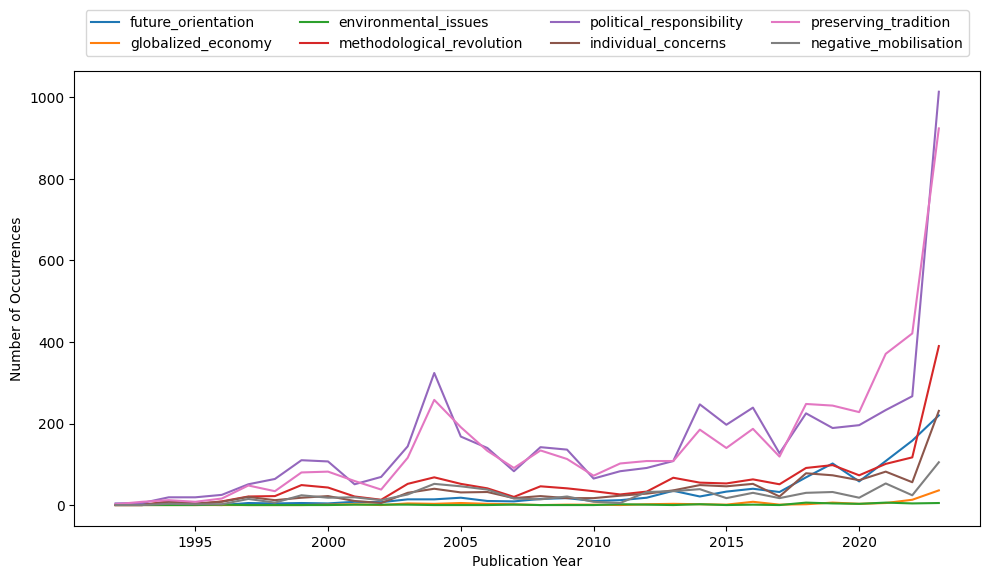

In [22]:
# Create a list of keys to plot
keys_to_plot = list(qual_mediaframes.keys())

# Create a new dataframe with only the columns of interest
plot_data = yearly_data[keys_to_plot]

# Plot the data
plot_data.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences')
plt.savefig('../Visuals/qual_mediaframes_total.png')
plt.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4)
plt.show()

In [23]:
# Create a copy of df
df_bool = df.copy()

# Add new columns to the dataframe df_copy for each key that is True if the key is in the article more than once and False if the key is not in the article
for key in qual_mediaframes.keys():
    df_bool[key] = df_bool[key].apply(lambda x: True if x > 0 else False)

In [24]:
# Create a new dataframe to store the aggregated data
yearly_data_bool = pd.DataFrame()

# Group the dataframe by year and calculate the article count and word count
yearly_data_bool['article_count'] = df_bool.groupby('publication_year')['text'].count()
yearly_data_bool['word_count'] = df_bool.groupby('publication_year')['word_count'].sum()

# Rename the column publication_year to year
yearly_data_bool.index.names = ['year']

# Group the dataframe by year and calculate the count for each key
for key in qual_mediaframes.keys():
    yearly_data_bool[key] = df_bool.groupby('publication_year')[key].sum()

plot_data_percentage = yearly_data_bool[keys_to_plot]

In [25]:
# Add a new column to the dataframe plot_data called 'publication_count' with the value of the column 'article_count' of the dataframe yearly_data_bool using loc
plot_data_percentage['publication_count'] = yearly_data_bool.loc[:, 'article_count']

# Add new columns to the dataframe plot_data for each key
for key in qual_mediaframes.keys():
    plot_data_percentage[key + '_percentage'] = plot_data_percentage[key] / plot_data_percentage['publication_count']

# Remove the columns for the keys
plot_data_percentage = plot_data_percentage.drop(columns=keys_to_plot)

# Remove the column 'publication_count'
plot_data_percentage = plot_data_percentage.drop(columns=['publication_count'])

C:\Users\Kai\AppData\Local\Temp\ipykernel_8700\3303098044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_percentage['publication_count'] = yearly_data_bool.loc[:, 'article_count']


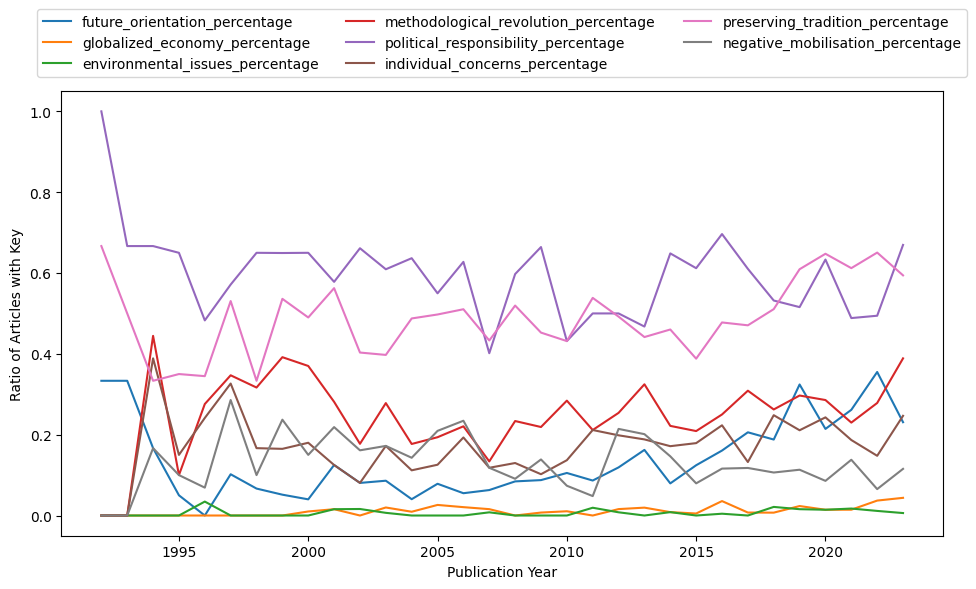

In [41]:
# Plot the data
plot_data_percentage.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Key')
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)
plt.savefig('../Visuals/qual_mediaframes_percentage.png')
plt.show()

In [27]:
#print all keys
print(list(qual_mediaframes.keys()))

['future_orientation', 'globalized_economy', 'environmental_issues', 'methodological_revolution', 'political_responsibility', 'individual_concerns', 'preserving_tradition', 'negative_mobilisation']


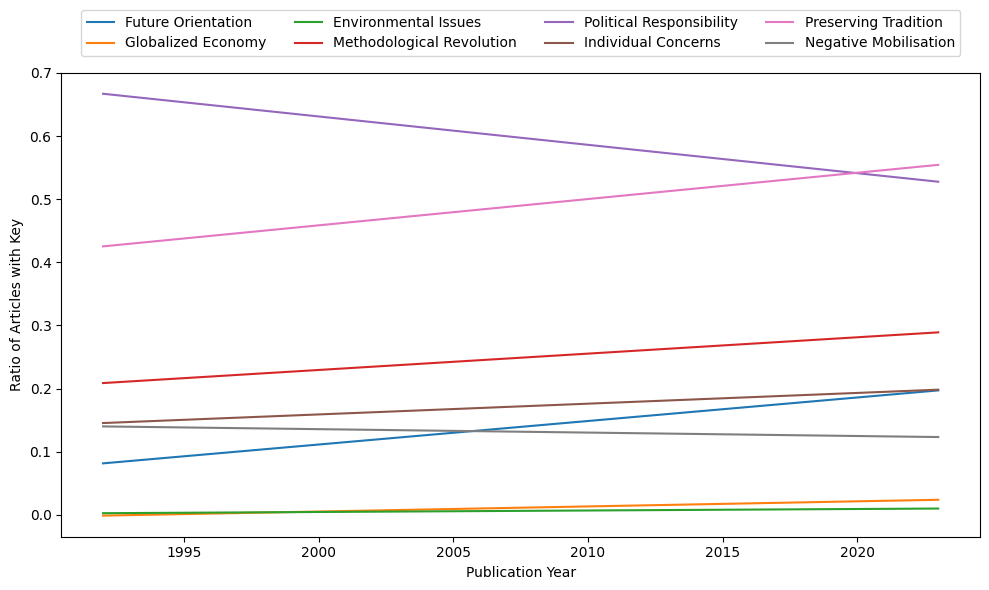

In [42]:
# Plot the regression lines
# Perform linear regression for each qual_mediaframes key
model_future_orientation_percentage = sm.OLS(plot_data_percentage['future_orientation_percentage'], sm.add_constant(plot_data_percentage.index)).fit()
model_globalized_economy_percentage = sm.OLS(plot_data_percentage['globalized_economy_percentage'], sm.add_constant(plot_data_percentage.index)).fit()
model_environmental_issues_percentage = sm.OLS(plot_data_percentage['environmental_issues_percentage'], sm.add_constant(plot_data_percentage.index)).fit()
model_methodological_revolution_percentage = sm.OLS(plot_data_percentage['methodological_revolution_percentage'], sm.add_constant(plot_data_percentage.index)).fit()
model_political_responsibility_percentage = sm.OLS(plot_data_percentage['political_responsibility_percentage'], sm.add_constant(plot_data_percentage.index)).fit()
model_individual_concerns_percentage = sm.OLS(plot_data_percentage['individual_concerns_percentage'], sm.add_constant(plot_data_percentage.index)).fit()
model_preserving_tradition_percentage = sm.OLS(plot_data_percentage['preserving_tradition_percentage'], sm.add_constant(plot_data_percentage.index)).fit()
model_negative_mobilisation_percentage = sm.OLS(plot_data_percentage['negative_mobilisation_percentage'], sm.add_constant(plot_data_percentage.index)).fit()

# Plot the regression lines
plt.figure(figsize=(10, 6))
plt.plot(plot_data_percentage.index, model_future_orientation_percentage.predict(sm.add_constant(plot_data_percentage.index)), label='Future Orientation')
plt.plot(plot_data_percentage.index, model_globalized_economy_percentage.predict(sm.add_constant(plot_data_percentage.index)), label='Globalized Economy')
plt.plot(plot_data_percentage.index, model_environmental_issues_percentage.predict(sm.add_constant(plot_data_percentage.index)), label='Environmental Issues')
plt.plot(plot_data_percentage.index, model_methodological_revolution_percentage.predict(sm.add_constant(plot_data_percentage.index)), label='Methodological Revolution')
plt.plot(plot_data_percentage.index, model_political_responsibility_percentage.predict(sm.add_constant(plot_data_percentage.index)), label='Political Responsibility')
plt.plot(plot_data_percentage.index, model_individual_concerns_percentage.predict(sm.add_constant(plot_data_percentage.index)), label='Individual Concerns')
plt.plot(plot_data_percentage.index, model_preserving_tradition_percentage.predict(sm.add_constant(plot_data_percentage.index)), label='Preserving Tradition')
plt.plot(plot_data_percentage.index, model_negative_mobilisation_percentage.predict(sm.add_constant(plot_data_percentage.index)), label='Negative Mobilisation')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Key')
plt.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4)
plt.savefig('../Visuals/qual_mediaframes_percentage_regression.png')
plt.show()

In [29]:
print(model_political_responsibility_percentage.summary())

                                     OLS Regression Results                                    
Dep. Variable:     political_responsibility_percentage   R-squared:                       0.151
Model:                                             OLS   Adj. R-squared:                  0.123
Method:                                  Least Squares   F-statistic:                     5.335
Date:                                 Wed, 24 Jan 2024   Prob (F-statistic):             0.0280
Time:                                         17:26:55   Log-Likelihood:                 28.802
No. Observations:                                   32   AIC:                            -53.60
Df Residuals:                                       30   BIC:                            -50.67
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
                 coef    std err        

In [30]:
print(model_preserving_tradition_percentage.summary())

                                   OLS Regression Results                                  
Dep. Variable:     preserving_tradition_percentage   R-squared:                       0.180
Model:                                         OLS   Adj. R-squared:                  0.152
Method:                              Least Squares   F-statistic:                     6.575
Date:                             Wed, 24 Jan 2024   Prob (F-statistic):             0.0156
Time:                                     17:26:55   Log-Likelihood:                 34.576
No. Observations:                               32   AIC:                            -65.15
Df Residuals:                                   30   BIC:                            -62.22
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [50]:
print(model_individual_concerns_percentage.summary())

                                  OLS Regression Results                                  
Dep. Variable:     individual_concerns_percentage   R-squared:                       0.042
Model:                                        OLS   Adj. R-squared:                  0.010
Method:                             Least Squares   F-statistic:                     1.314
Date:                            Wed, 24 Jan 2024   Prob (F-statistic):              0.261
Time:                                    17:33:36   Log-Likelihood:                 37.423
No. Observations:                              32   AIC:                            -70.85
Df Residuals:                                  30   BIC:                            -67.91
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [31]:
# Copy the dataframe plot_data to a new dataframe plot_data_percentage_article
plot_data_percentage_article = plot_data.copy()

# Add a new column to the dataframe plot_data called 'publication_count' with the value of the column 'article_count' of the dataframe yearly_data using loc
plot_data_percentage_article['publication_count'] = yearly_data.loc[:, 'article_count']

# Add new columns to the dataframe plot_data for each key
for key in qual_mediaframes.keys():
    plot_data_percentage_article[key + '_percentage'] = plot_data_percentage_article[key] / plot_data_percentage_article['publication_count']

# Remove the columns for the keys
plot_data_percentage_article = plot_data_percentage_article.drop(columns=keys_to_plot)

# Remove the column 'publication_count'
plot_data_percentage_article = plot_data_percentage_article.drop(columns=['publication_count'])

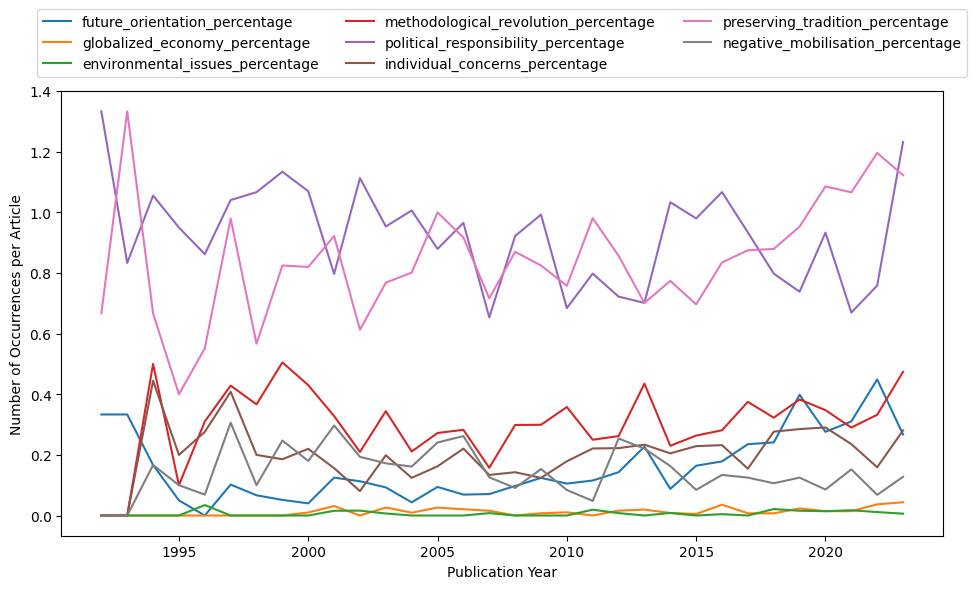

In [43]:
# Plot the data
plot_data_percentage_article.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences per Article')
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)
plt.savefig('../Visuals/qual_mediaframes_per_article.png')
plt.show()

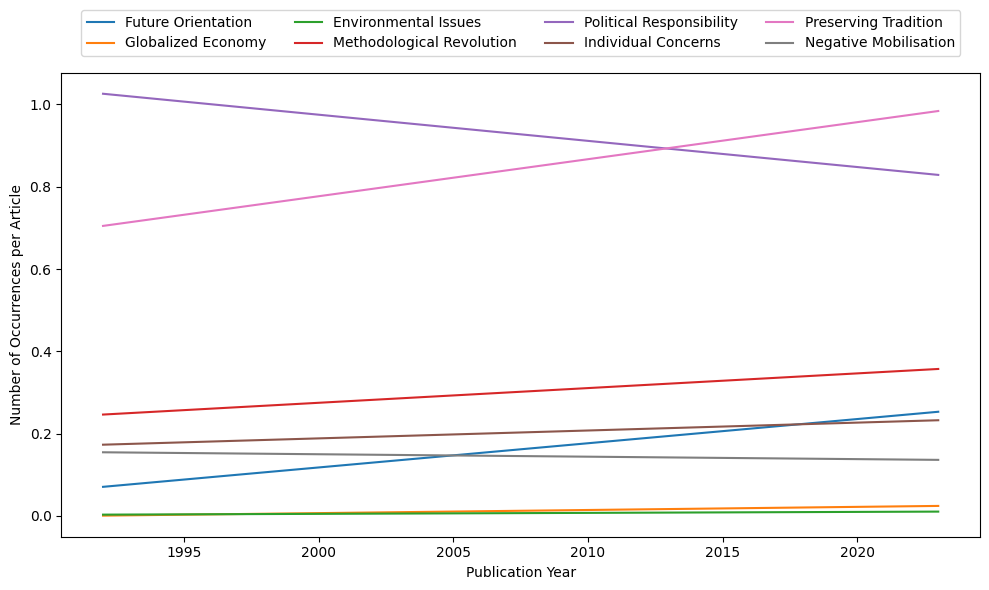

In [44]:
# Plot the regression lines
# Perform linear regression for each qual_mediaframes key
model_future_orientation_percentage_article = sm.OLS(plot_data_percentage_article['future_orientation_percentage'], sm.add_constant(plot_data_percentage_article.index)).fit()
model_globalized_economy_percentage_article = sm.OLS(plot_data_percentage_article['globalized_economy_percentage'], sm.add_constant(plot_data_percentage_article.index)).fit()
model_environmental_issues_percentage_article = sm.OLS(plot_data_percentage_article['environmental_issues_percentage'], sm.add_constant(plot_data_percentage_article.index)).fit()
model_methodological_revolution_percentage_article = sm.OLS(plot_data_percentage_article['methodological_revolution_percentage'], sm.add_constant(plot_data_percentage_article.index)).fit()
model_political_responsibility_percentage_article = sm.OLS(plot_data_percentage_article['political_responsibility_percentage'], sm.add_constant(plot_data_percentage_article.index)).fit()
model_individual_concerns_percentage_article = sm.OLS(plot_data_percentage_article['individual_concerns_percentage'], sm.add_constant(plot_data_percentage_article.index)).fit()
model_preserving_tradition_percentage_article = sm.OLS(plot_data_percentage_article['preserving_tradition_percentage'], sm.add_constant(plot_data_percentage_article.index)).fit()
model_negative_mobilisation_percentage_article = sm.OLS(plot_data_percentage_article['negative_mobilisation_percentage'], sm.add_constant(plot_data_percentage_article.index)).fit()

# Plot the regression lines
plt.figure(figsize=(10, 6))
plt.plot(plot_data_percentage_article.index, model_future_orientation_percentage_article.predict(sm.add_constant(plot_data_percentage_article.index)), label='Future Orientation')
plt.plot(plot_data_percentage_article.index, model_globalized_economy_percentage_article.predict(sm.add_constant(plot_data_percentage_article.index)), label='Globalized Economy')
plt.plot(plot_data_percentage_article.index, model_environmental_issues_percentage_article.predict(sm.add_constant(plot_data_percentage_article.index)), label='Environmental Issues')
plt.plot(plot_data_percentage_article.index, model_methodological_revolution_percentage_article.predict(sm.add_constant(plot_data_percentage_article.index)), label='Methodological Revolution')
plt.plot(plot_data_percentage_article.index, model_political_responsibility_percentage_article.predict(sm.add_constant(plot_data_percentage_article.index)), label='Political Responsibility')
plt.plot(plot_data_percentage_article.index, model_individual_concerns_percentage_article.predict(sm.add_constant(plot_data_percentage_article.index)), label='Individual Concerns')
plt.plot(plot_data_percentage_article.index, model_preserving_tradition_percentage_article.predict(sm.add_constant(plot_data_percentage_article.index)), label='Preserving Tradition')
plt.plot(plot_data_percentage_article.index, model_negative_mobilisation_percentage_article.predict(sm.add_constant(plot_data_percentage_article.index)), label='Negative Mobilisation')
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences per Article')
plt.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4)
plt.savefig('../Visuals/qual_mediaframes_per_article_regression.png')
plt.show()

In [34]:
# Copy the dataframe plot_data to a new dataframe plot_data_percentage_word
plot_data_percentage_word = plot_data.copy()

# Add a new column to the dataframe plot_data called 'word_count' with the value of the column 'word_count' of the dataframe yearly_data using loc
plot_data_percentage_word['word_count'] = yearly_data.loc[:, 'word_count']

# Add new columns to the dataframe plot_data for each key
for key in qual_mediaframes.keys():
    plot_data_percentage_word[key + '_percentage'] = plot_data_percentage_word[key] / plot_data_percentage_word['word_count']

# Remove the columns for the keys
plot_data_percentage_word = plot_data_percentage_word.drop(columns=keys_to_plot)

# Remove the column 'publication_count'
plot_data_percentage_word = plot_data_percentage_word.drop(columns=['word_count'])

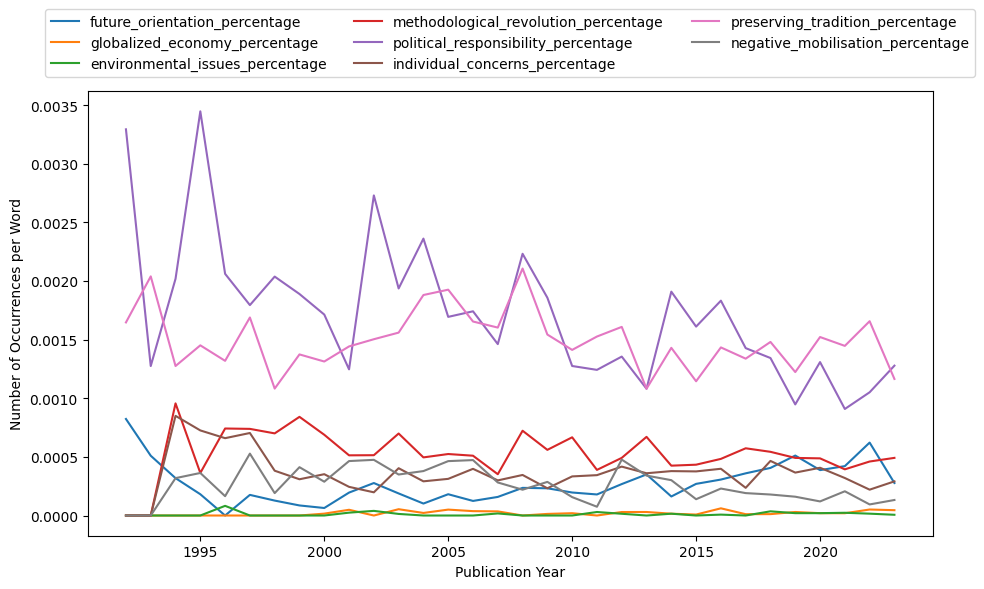

In [45]:
# Plot the data
plot_data_percentage_word.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences per Word')
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)
plt.savefig('../Visuals/qual_mediaframes_per_word.png')
plt.show()

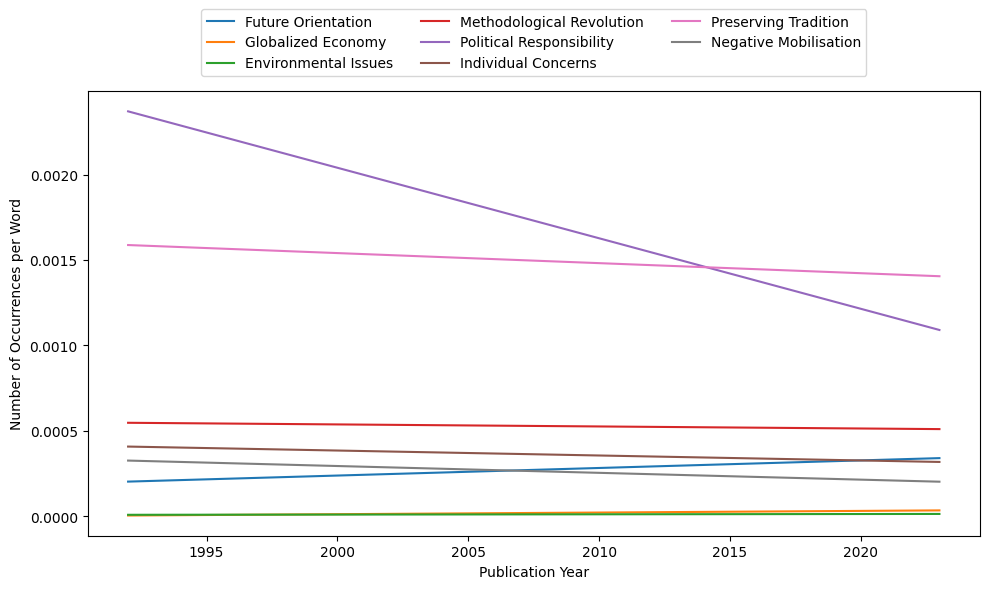

In [47]:
# Plot the regression lines
# Perform linear regression for each qual_mediaframes key
model_future_orientation_percentage_word = sm.OLS(plot_data_percentage_word['future_orientation_percentage'], sm.add_constant(plot_data_percentage_word.index)).fit()
model_globalized_economy_percentage_word = sm.OLS(plot_data_percentage_word['globalized_economy_percentage'], sm.add_constant(plot_data_percentage_word.index)).fit()
model_environmental_issues_percentage_word = sm.OLS(plot_data_percentage_word['environmental_issues_percentage'], sm.add_constant(plot_data_percentage_word.index)).fit()
model_methodological_revolution_percentage_word = sm.OLS(plot_data_percentage_word['methodological_revolution_percentage'], sm.add_constant(plot_data_percentage_word.index)).fit()
model_political_responsibility_percentage_word = sm.OLS(plot_data_percentage_word['political_responsibility_percentage'], sm.add_constant(plot_data_percentage_word.index)).fit()
model_individual_concerns_percentage_word = sm.OLS(plot_data_percentage_word['individual_concerns_percentage'], sm.add_constant(plot_data_percentage_word.index)).fit()
model_preserving_tradition_percentage_word = sm.OLS(plot_data_percentage_word['preserving_tradition_percentage'], sm.add_constant(plot_data_percentage_word.index)).fit()
model_negative_mobilisation_percentage_word = sm.OLS(plot_data_percentage_word['negative_mobilisation_percentage'], sm.add_constant(plot_data_percentage_word.index)).fit()

# Plot the regression lines
plt.figure(figsize=(10, 6))
plt.plot(plot_data_percentage_word.index, model_future_orientation_percentage_word.predict(sm.add_constant(plot_data_percentage_word.index)), label='Future Orientation')
plt.plot(plot_data_percentage_word.index, model_globalized_economy_percentage_word.predict(sm.add_constant(plot_data_percentage_word.index)), label='Globalized Economy')
plt.plot(plot_data_percentage_word.index, model_environmental_issues_percentage_word.predict(sm.add_constant(plot_data_percentage_word.index)), label='Environmental Issues')
plt.plot(plot_data_percentage_word.index, model_methodological_revolution_percentage_word.predict(sm.add_constant(plot_data_percentage_word.index)), label='Methodological Revolution')
plt.plot(plot_data_percentage_word.index, model_political_responsibility_percentage_word.predict(sm.add_constant(plot_data_percentage_word.index)), label='Political Responsibility')
plt.plot(plot_data_percentage_word.index, model_individual_concerns_percentage_word.predict(sm.add_constant(plot_data_percentage_word.index)), label='Individual Concerns')
plt.plot(plot_data_percentage_word.index, model_preserving_tradition_percentage_word.predict(sm.add_constant(plot_data_percentage_word.index)), label='Preserving Tradition')
plt.plot(plot_data_percentage_word.index, model_negative_mobilisation_percentage_word.predict(sm.add_constant(plot_data_percentage_word.index)), label='Negative Mobilisation')
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences per Word')
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)
plt.savefig('../Visuals/qual_mediaframes_per_word_regression.png')
plt.show()

In [51]:
# Special analysis for the key 'Preserving Tradition'
# Add a column in df for each word in 'preserving_tradition'
for word in qual_mediaframes['preserving_tradition']:
    df[word] = 0

# Load the German language model in Spacy
nlp = spacy.load('de_core_news_sm')

# Iterate over each row in the dataframe and count the number of times each of the words in 'preserving_tradition' appears
for i, row in df.iterrows():
    # Get the text
    text = row["text"]
    
    # Create a spacy doc
    doc = nlp(text)
    
    # Iterate over each word in the list
    for word in qual_mediaframes['preserving_tradition']:
        # Check if the word is in the doc
        if word in doc.text:
            # Increment the counter
            df.loc[i, word] += 1

df

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,future_orientation,globalized_economy,...,bäuerlich,erhalten,bewahren,traditionelle erzeugung,traditioneller anbau,kleine betriebe,ökoanbau,kulturlandschaft,konventionell,unkontrolliert
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,763,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,708,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,632,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen...,225,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,631,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5280,67KW1VK1F15WB4660000000,Kein Titel,2023-02-21,2023,ZEIT Wissen,6 Am anfang drei Fragen 1. Können wir andere m...,6 an anfang drei frage 1 können wir anderer mi...,305,0,0,...,0,0,0,0,0,0,0,0,0,0
5281,67KW1VK1F15WB46B0000000,Leben und schmecken lassen,2023-02-21,2023,ZEIT Wissen,"Ein saftiges Filet, für das kein Huhn sterben ...",ein saftig filet für der kein huhn sterben mus...,266,0,0,...,0,0,0,0,0,0,0,0,0,0
5282,7W29GN20YC2460S30000000,ABSCHIED VOM ALTEN ITALIEN,2009-05-13,2009,ZEIT Wissen,John Dickie: »Delizia! Die Italiener und ihre...,john dickie delizia der italiener und ihr kü...,912,0,0,...,0,0,1,0,0,0,0,0,0,0
5283,7X8DW4712SK2G0H10000000,Essen aus dem Labor,2009-12-08,2009,ZEIT Wissen,Es ist der letzte Tag auf der Lebensmittelmess...,es sein der letzter tag auf der lebensmittelme...,2548,1,0,...,0,1,0,0,0,0,0,0,0,0


In [52]:
# Create a new dataframe to store the aggregated data
yearly_data2 = pd.DataFrame()

# Group the dataframe by year and calculate the article count and word count
yearly_data2['article_count'] = df.groupby('publication_year')['text'].count()
yearly_data2['word_count'] = df.groupby('publication_year')['word_count'].sum()

# Rename the column publication_year to year
yearly_data2.index.names = ['year']

# Group the dataframe by year and calculate the count for each word in 'preserving_tradition'
for word in qual_mediaframes['preserving_tradition']:
    yearly_data2[word] = df.groupby('publication_year')[word].sum()

In [53]:
# Create a list of words to plot
words_to_plot = list(qual_mediaframes['preserving_tradition'])

# Create a new dataframe with only the columns of interest
plot_data2 = yearly_data2[words_to_plot]

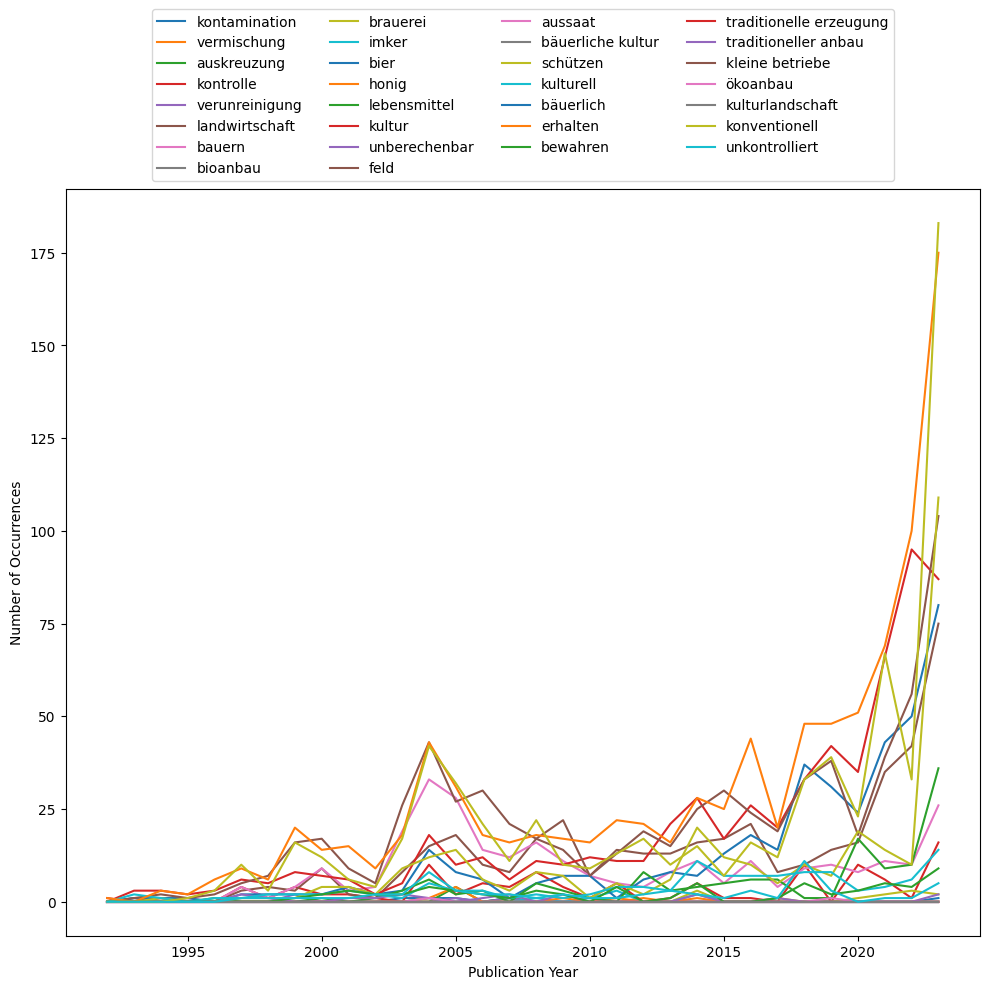

In [62]:
# Plot the data
plot_data2.plot(kind='line', figsize=(10, 10))
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences')
plt.legend(bbox_to_anchor=(0.5, 1.25), loc='upper center', ncol=4)
plt.savefig('../Visuals/qual_mediaframes_preserving_tradition.png')
plt.show()

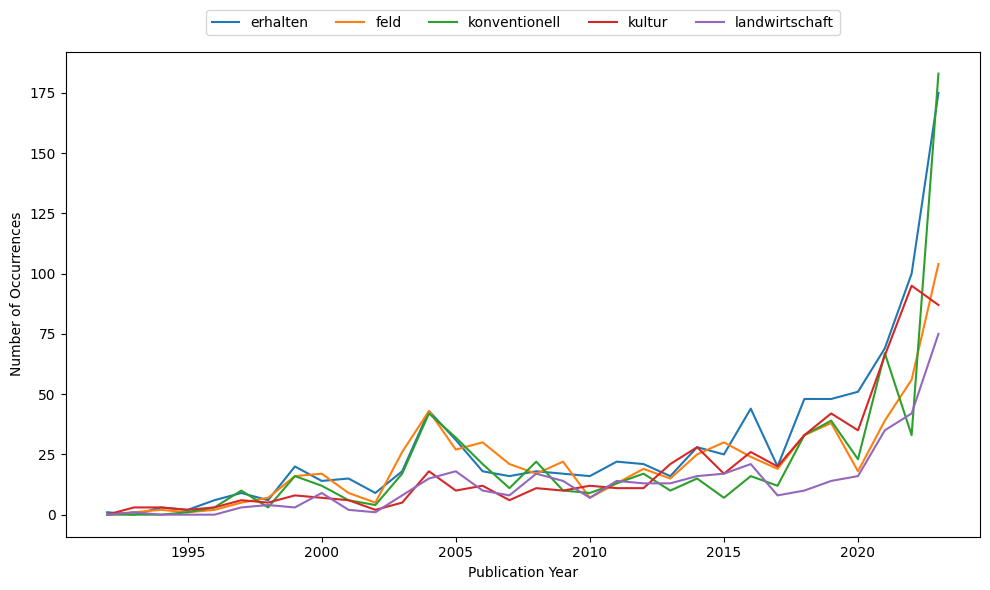

In [55]:
# Check which 5 words occur most often in the articles and save them in a list
most_common_words = plot_data2.sum().sort_values(ascending=False).head(5).index.tolist()

# Create a new dataframe with only the columns of interest
plot_data3 = plot_data2[most_common_words]

# Plot the data
plot_data3.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences')
plt.legend(bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=5)
plt.savefig('../Visuals/qual_mediaframes_preserving_tradition_most_common.png')
plt.show()

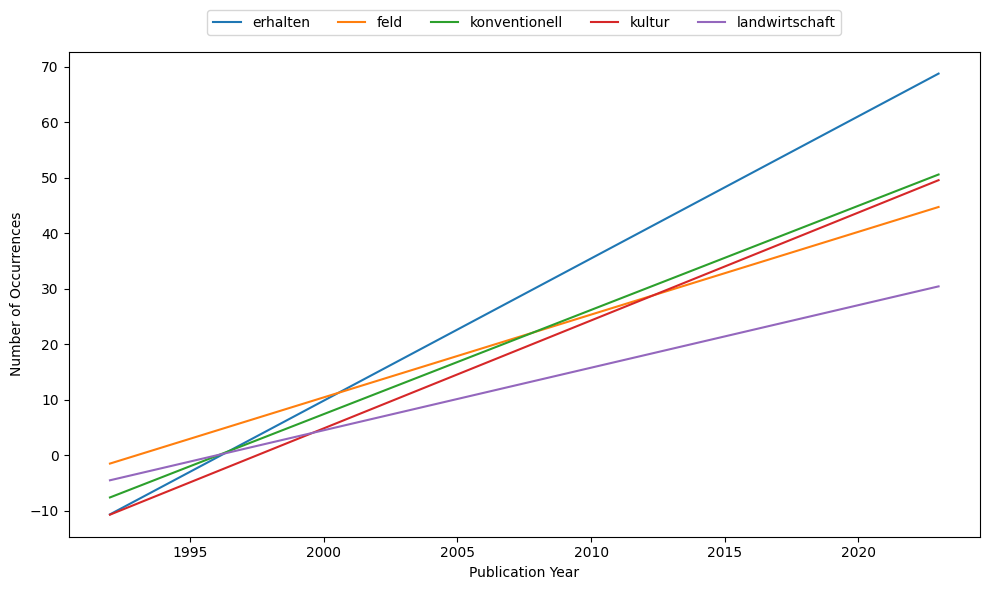

In [56]:
# Plot the regression lines
# Perform linear regression for plot_data3, which contains the date for the words in most_common_words
model_1 = sm.OLS(plot_data3[most_common_words[0]], sm.add_constant(plot_data3.index)).fit()
model_2 = sm.OLS(plot_data3[most_common_words[1]], sm.add_constant(plot_data3.index)).fit()
model_3 = sm.OLS(plot_data3[most_common_words[2]], sm.add_constant(plot_data3.index)).fit()
model_4 = sm.OLS(plot_data3[most_common_words[3]], sm.add_constant(plot_data3.index)).fit()
model_5 = sm.OLS(plot_data3[most_common_words[4]], sm.add_constant(plot_data3.index)).fit()

# Plot the regression lines
plt.figure(figsize=(10, 6))
plt.plot(plot_data3.index, model_1.predict(sm.add_constant(plot_data3.index)), label=most_common_words[0])
plt.plot(plot_data3.index, model_2.predict(sm.add_constant(plot_data3.index)), label=most_common_words[1])
plt.plot(plot_data3.index, model_3.predict(sm.add_constant(plot_data3.index)), label=most_common_words[2])
plt.plot(plot_data3.index, model_4.predict(sm.add_constant(plot_data3.index)), label=most_common_words[3])
plt.plot(plot_data3.index, model_5.predict(sm.add_constant(plot_data3.index)), label=most_common_words[4])
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences')
plt.legend(bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=5)
plt.savefig('../Visuals/qual_mediaframes_preserving_tradition_most_common_regression.png')
plt.show()